# Assignment 10

## Assignment 10.1.a

In [55]:
import re
import string

def text_cleaning(text):
    """
    # Define function to perform below text cleaning
    # Make text lowercase
    # Remove text in square brackets
    # Remove links
    # Remove special characters
    # Remove words containing numbers
    # Remove punctuation
    """
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text) # removes words with 2 or less charectors.
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text



def tokenize(sentence):
    """
    tokanizes a corpus
    """
    tokens = []
#     sentence = sentence.lower()
#     sentence = re.sub(' +',' ',sentence)
    tokens = re.findall("[\w']+", text_cleaning(sentence))
    return tokens

In [56]:
tokens = tokenize("Founded founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth.")

In [57]:
len(tokens)

32

## Assignment 10.1.b

In [37]:
len(tokens)

32

In [79]:
def ngram(tokens, n):
    """
    Creates n grams from a token of words
    """
    ngrams = []
    # Create ngrams
#     for i in range(len(tokens) - n+1):
#         ngrams.append(tokens[i:i+n])
    mgram = [ngrams.append(tokens[i:i+n]) for i in range(len(tokens) - n+1)]
    ngrams = [" ".join(ngram) for ngram in ngrams]
    return ngrams

In [82]:
ngram(tokens, 5)

['founded founded spacex mission enable',
 'founded spacex mission enable humans',
 'spacex mission enable humans become',
 'mission enable humans become spacefaring',
 'enable humans become spacefaring civilization',
 'humans become spacefaring civilization and',
 'become spacefaring civilization and multi',
 'spacefaring civilization and multi planet',
 'civilization and multi planet species',
 'and multi planet species building',
 'multi planet species building self',
 'planet species building self sustaining',
 'species building self sustaining city',
 'building self sustaining city mars',
 'self sustaining city mars spacex',
 'sustaining city mars spacex falcon',
 'city mars spacex falcon became',
 'mars spacex falcon became the',
 'spacex falcon became the first',
 'falcon became the first privately',
 'became the first privately developed',
 'the first privately developed liquid',
 'first privately developed liquid fuel',
 'privately developed liquid fuel launch',
 'developed li

## Assignment 10.1.c

In [101]:
import numpy as np

def one_hot_encode(tokens, num_words):
    token_index = {}
    results = ''
    
    for token in tokens:                                     
        if token not in token_index:
            token_index[token] = len(token_index) + 1                   

    max_length = num_words                                                        

    results = np.zeros(shape=(len(tokens),
                              max_length,
                              max(token_index.values()) + 1))              
    for i, token in enumerate(tokens):
        for j, token in list(enumerate(tokens))[:max_length]:
            index = token_index.get(token)
            results[i, j, index] = 1.

    return results


In [102]:
one_hot_encode(tokens, 10)

array([[[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Assignment 10.2

In [109]:
import os

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [120]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100                                           
training_samples = 10000                                 
validation_samples = 200                             
max_words = 10000                                      

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])                     
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [121]:
glove_dir = '/home/jovyan/dsc650/data/external/glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [122]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [123]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [125]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
313/313 [==============================] - 2s 4ms/step - loss: 0.8299 - acc: 0.5779 - val_loss: 0.6492 - val_acc: 0.6050
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5544 - acc: 0.7282 - val_loss: 0.7669 - val_acc: 0.5850
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4664 - acc: 0.7764 - val_loss: 0.7867 - val_acc: 0.6100
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4013 - acc: 0.8140 - val_loss: 0.7701 - val_acc: 0.6400
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3447 - acc: 0.8497 - val_loss: 0.8392 - val_acc: 0.6250
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2956 - acc: 0.8736 - val_loss: 0.9133 - val_acc: 0.6300
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2472 - acc: 0.8965 - val_loss: 1.0977 - val_acc: 0.6250
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.

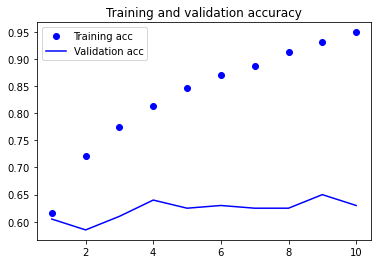

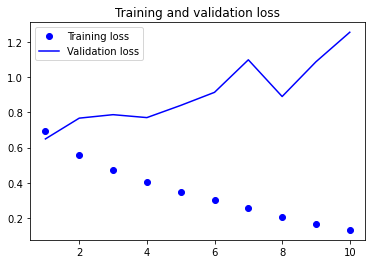

In [126]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [127]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 3s 7ms/step - loss: 0.6014 - acc: 0.6466 - val_loss: 0.3867 - val_acc: 0.8300
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 0.1382 - acc: 0.9553 - val_loss: 0.4

In [128]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [129]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.6013 - acc: 0.8020


[0.6013426780700684, 0.8020399808883667]

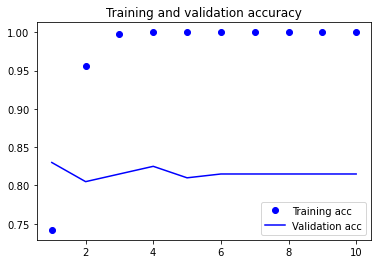

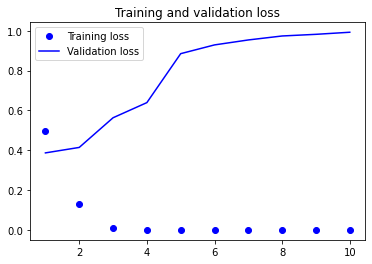

In [130]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Assignment 10.3

In [134]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000                                  
maxlen = 500                                          
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)


Loading data...
17465344/17464789 [==============================] - 1s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [136]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
# model.save_weights('lstm_model.h5')

Epoch 1/10
157/157 [==============================] - 62s 386ms/step - loss: 0.6597 - acc: 0.6351 - val_loss: 0.3964 - val_acc: 0.8388
Epoch 2/10
157/157 [==============================] - 58s 371ms/step - loss: 0.3363 - acc: 0.8694 - val_loss: 0.5215 - val_acc: 0.7924
Epoch 3/10
157/157 [==============================] - 58s 372ms/step - loss: 0.2645 - acc: 0.9001 - val_loss: 0.3559 - val_acc: 0.8486
Epoch 4/10
157/157 [==============================] - 58s 371ms/step - loss: 0.2132 - acc: 0.9240 - val_loss: 0.2847 - val_acc: 0.8878
Epoch 5/10
157/157 [==============================] - 58s 367ms/step - loss: 0.1738 - acc: 0.9376 - val_loss: 0.3049 - val_acc: 0.8924
Epoch 6/10
157/157 [==============================] - 58s 369ms/step - loss: 0.1569 - acc: 0.9446 - val_loss: 0.2967 - val_acc: 0.8898
Epoch 7/10
157/157 [==============================] - 59s 374ms/step - loss: 0.1421 - acc: 0.9511 - val_loss: 0.3201 - val_acc: 0.8872
Epoch 8/10
157/157 [==============================] - 5

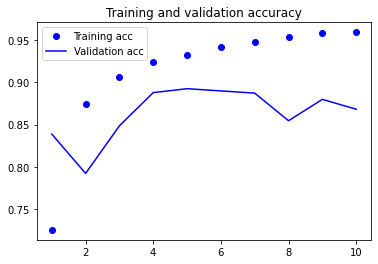

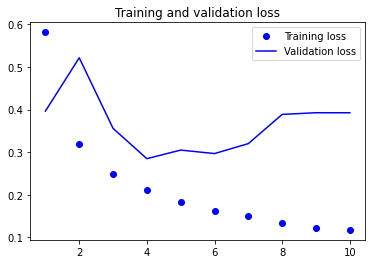

In [137]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [139]:
# model.load_weights('lstm_model.h5')
# model.evaluate(x_test, y_test)

## Assignment 10.4

In [145]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [146]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
# model.save_weights('1D_model.h5')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

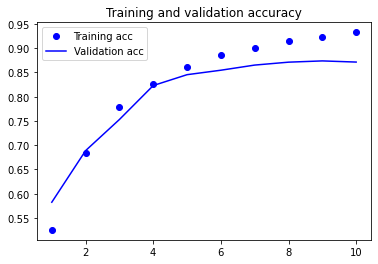

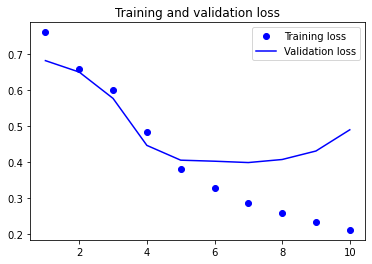

In [147]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()